# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Define the URL
temp_units = "imperial"
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)




625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------\nData Retrieval Complete\n------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | hastings
Processing Record 5 of Set 1 | flin flon
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | puerto escondido
Processing Record 8 of Set 1 | gari
Processing Record 9 of Set 1 | upernavik
Processing Record 10 of Set 1 | perth
City not found. Skipping...
City not found. Skipping...
Processing Record 11 of Set 1 | cockburn town
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | isangel
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | bethel
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | port hedland
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | araouane
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | lebu
Processing Record 23 of Set 1 | barrow
Pro

City not found. Skipping...
Processing Record 37 of Set 4 | castro
Processing Record 38 of Set 4 | bandarbeyla
Processing Record 39 of Set 4 | marawi
Processing Record 40 of Set 4 | maner
Processing Record 41 of Set 4 | maubin
Processing Record 42 of Set 4 | guerrero negro
Processing Record 43 of Set 4 | gemena
Processing Record 44 of Set 4 | chubbuck
Processing Record 45 of Set 4 | newtonmore
Processing Record 46 of Set 4 | san dimas
Processing Record 47 of Set 4 | saint-paul
City not found. Skipping...
Processing Record 48 of Set 4 | kamiiso
City not found. Skipping...
Processing Record 49 of Set 4 | santa rosa
Processing Record 1 of Set 5 | vestmannaeyjar
Processing Record 2 of Set 5 | tshikapa
Processing Record 3 of Set 5 | lilienthal
Processing Record 4 of Set 5 | pishva
Processing Record 5 of Set 5 | sitka
City not found. Skipping...
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | tautira
Processing Record 8 of Set 5 | saint-philippe
Processing Record 9 of

Processing Record 30 of Set 8 | maxixe
Processing Record 31 of Set 8 | acapulco
City not found. Skipping...
Processing Record 32 of Set 8 | pangobilian
Processing Record 33 of Set 8 | kirakira
Processing Record 34 of Set 8 | bereda
Processing Record 35 of Set 8 | nyakabindi
Processing Record 36 of Set 8 | santa maria
Processing Record 37 of Set 8 | warrington
City not found. Skipping...
City not found. Skipping...
Processing Record 38 of Set 8 | luganville
City not found. Skipping...
City not found. Skipping...
Processing Record 39 of Set 8 | hobyo
Processing Record 40 of Set 8 | dergachi
Processing Record 41 of Set 8 | komatipoort
Processing Record 42 of Set 8 | east moline
Processing Record 43 of Set 8 | shimanovsk
Processing Record 44 of Set 8 | toribio
Processing Record 45 of Set 8 | tevaitoa
City not found. Skipping...
Processing Record 46 of Set 8 | khandbari
Processing Record 47 of Set 8 | ponta delgada
Processing Record 48 of Set 8 | sidi ali
Processing Record 49 of Set 8 | lau

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary for establishing dataframe
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# Establish dataframe
weather_dataframe = pd.DataFrame(weather_dict)

weather_dataframe.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [5]:
# output data to csv
weather_dataframe.to_csv(output_data_file)

In [6]:
# show the top of the dataframe
weather_dataframe.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,new norfolk,75,LR,1568048725,94,6.65,-10.59,78.80,6.93
1,rikitea,85,PF,1568048761,61,-23.12,-134.97,69.17,9.04
2,hermanus,0,ZA,1568048761,87,-34.42,19.24,63.00,6.89
3,hastings,100,NZ,1568048761,92,-39.64,176.84,35.69,0.18
4,flin flon,0,FR,1568048761,45,48.50,6.66,64.40,4.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

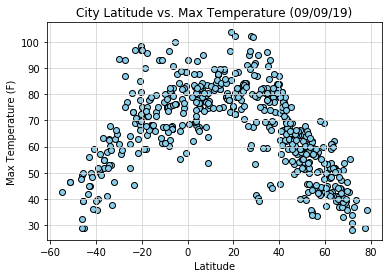

In [7]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (09/09/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig1.png")
plt.show()


#### Latitude vs. Humidity Plot

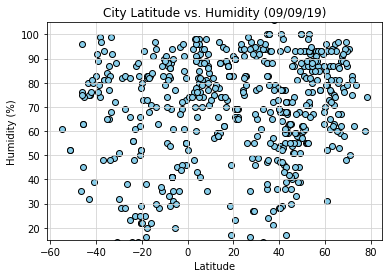

In [8]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (09/09/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

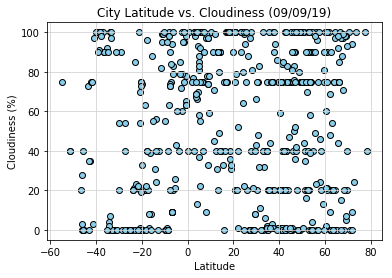

In [9]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (09/09/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

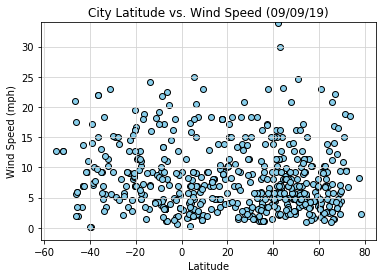

In [10]:
plt.scatter(weather_dataframe["Lat"],weather_dataframe["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (09/09/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Figures/fig4.png")
plt.show()

# ANALYSIS
----

Observable Trend on "City Latitude vs. Max Temperature": The data goes to prove that the weather gets hotter as we get closer to the equator (0*). 

Observable Trend on "City Latitude vs. Humidity": Most of the data points seem to be above the 50% "Humidity" mark. Thurmore, many of the data points show a clear favoritism towards there being more humidity as we go futher up in latitude. 

Observable Trend on "City Latitude vs. Cloudiness": I see no strong correlation between a city's latitude and how cloudy it is. The data seems very balanced. We should take note however, of the three rows of possible trends represented at the 0%, 75% and 100% "Cloudiness."

Observable Trend on "City Latitude vs. Wind Speed": The data shows that most of the Wind Speeds are between 0 and 15 "mph" regardless of the latitdude of a city. Thus, I am unable to see a correlation between the latitude of a city and how windy it is. 